# Cole's Notebook

## Introduction

My dataset is a complation of different Pittsburgh Traffic analyses. Below I import pandas, numpy, and matplotlib.pyplot. I also read that dataset and put it into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
traffic = pd.read_csv("Traffic.csv", index_col="id")

Below I filter out all the rows that have NULL values in the columns **average_daily_car_traffic**, **neighborhood**, and **percent_over_limit** and save it to **traffic_no_empty**. I do this because the data is usless to me without a neighborhood to place it in or an average daily traffic number to attach to that neighborhood. I then take that **traffic_no_empty** DataFrame and filter out the columns **average_daily_car_traffic** and **neighborhood** into **traffic_filtered**. I do this so I plot this data easily later. I do the same thing with columns **percent_over_limit** and **neighborhood** into **traffic_limit**.

In [2]:
traffic_no_empty = traffic[traffic['average_daily_car_traffic'].notnull()]
traffic_no_empty = traffic_no_empty[traffic_no_empty['neighborhood'].notnull()]
traffic_no_empty = traffic_no_empty[traffic_no_empty['percent_over_limit'].notnull()]
traffic_filtered = traffic_no_empty.filter(['neighborhood', 'average_daily_car_traffic'])
traffic_limit = traffic_no_empty.filter(['neighborhood','percent_over_limit'])

Below is the printout of the data grouped by neighborhood and its mean taken. This is to show the average daily car traffic for each neighborhood.

In [3]:
traffic_filtered.groupby('neighborhood').mean()

,average_daily_car_traffic
neighborhood,
Allegheny Center,2386.000000
Allegheny West,477.000000
Arlington,2285.500000
Beechview,1418.333333
Bloomfield,3189.625000
...,...
Summer Hill,937.000000
Upper Hill,953.333333
West Oakland,2585.000000


Below is the printout of the same thing as above, sorted by average daily car traffic.

In [4]:
traffic_filtered.groupby('neighborhood').mean().sort_values('average_daily_car_traffic')

,average_daily_car_traffic
neighborhood,
South Side Flats,115.000000
Lincoln Place,126.000000
Lincoln-Lemington-Belmar,195.000000
Fineview,419.000000
Allegheny West,477.000000
...,...
East Hills,8126.500000
Strip District,9691.666667
North Shore,10350.000000


Same as above, but ploted on a horizontal bar graph.

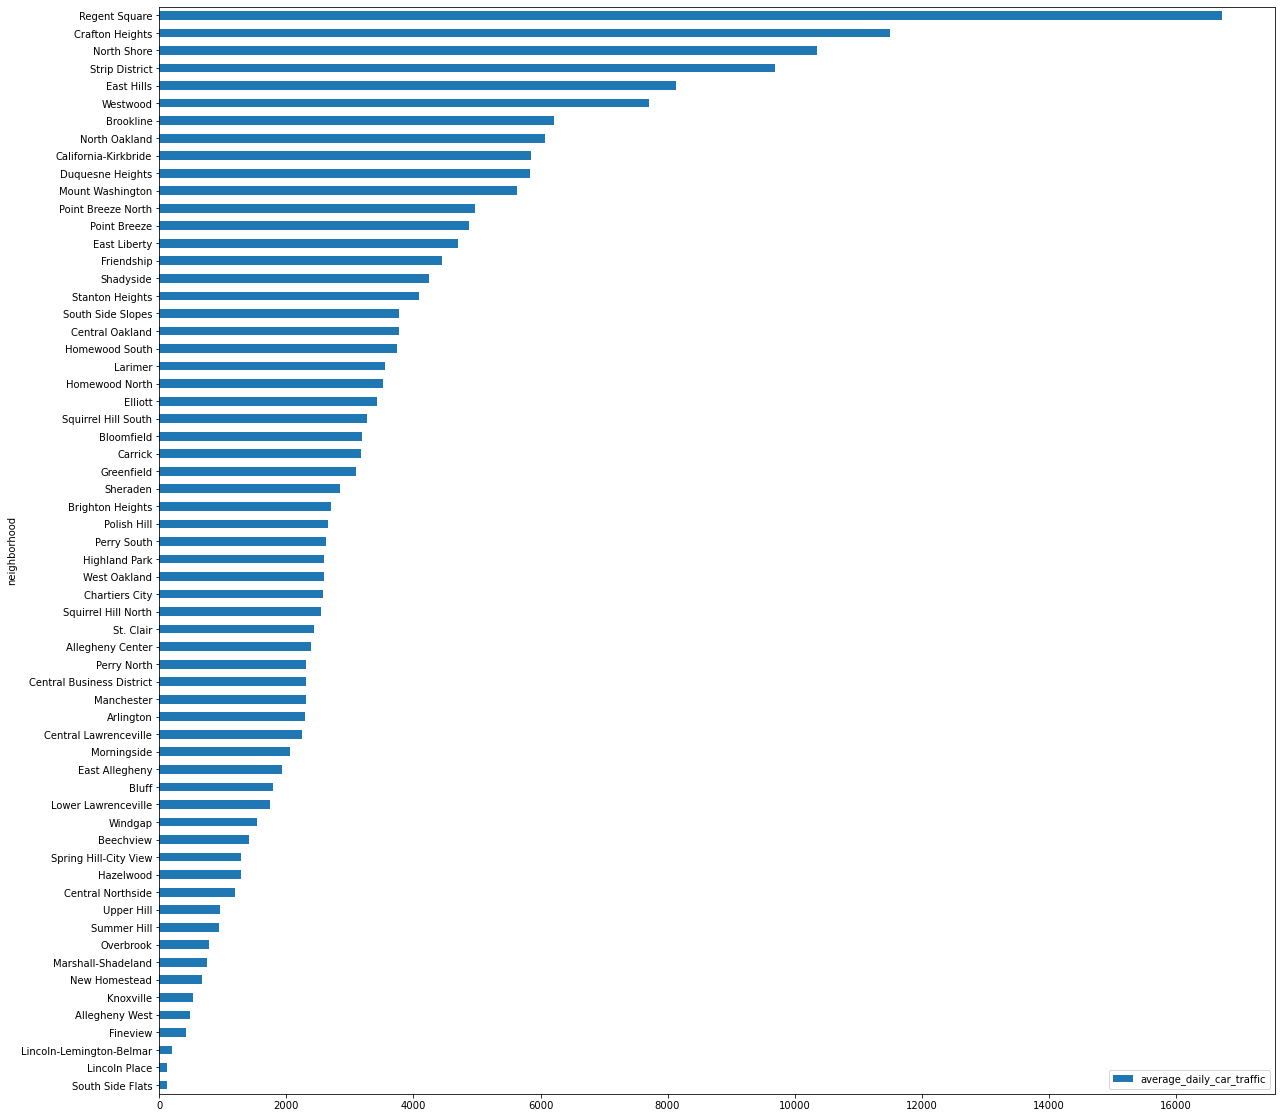

In [5]:
traffic_filtered.groupby('neighborhood').mean().sort_values('average_daily_car_traffic').plot.barh(figsize=(20,20));

Below is a similarly organized horizontal bar graph, but this is using the **traffic_limit dataset** and its sorted by **percent_over_limit**.

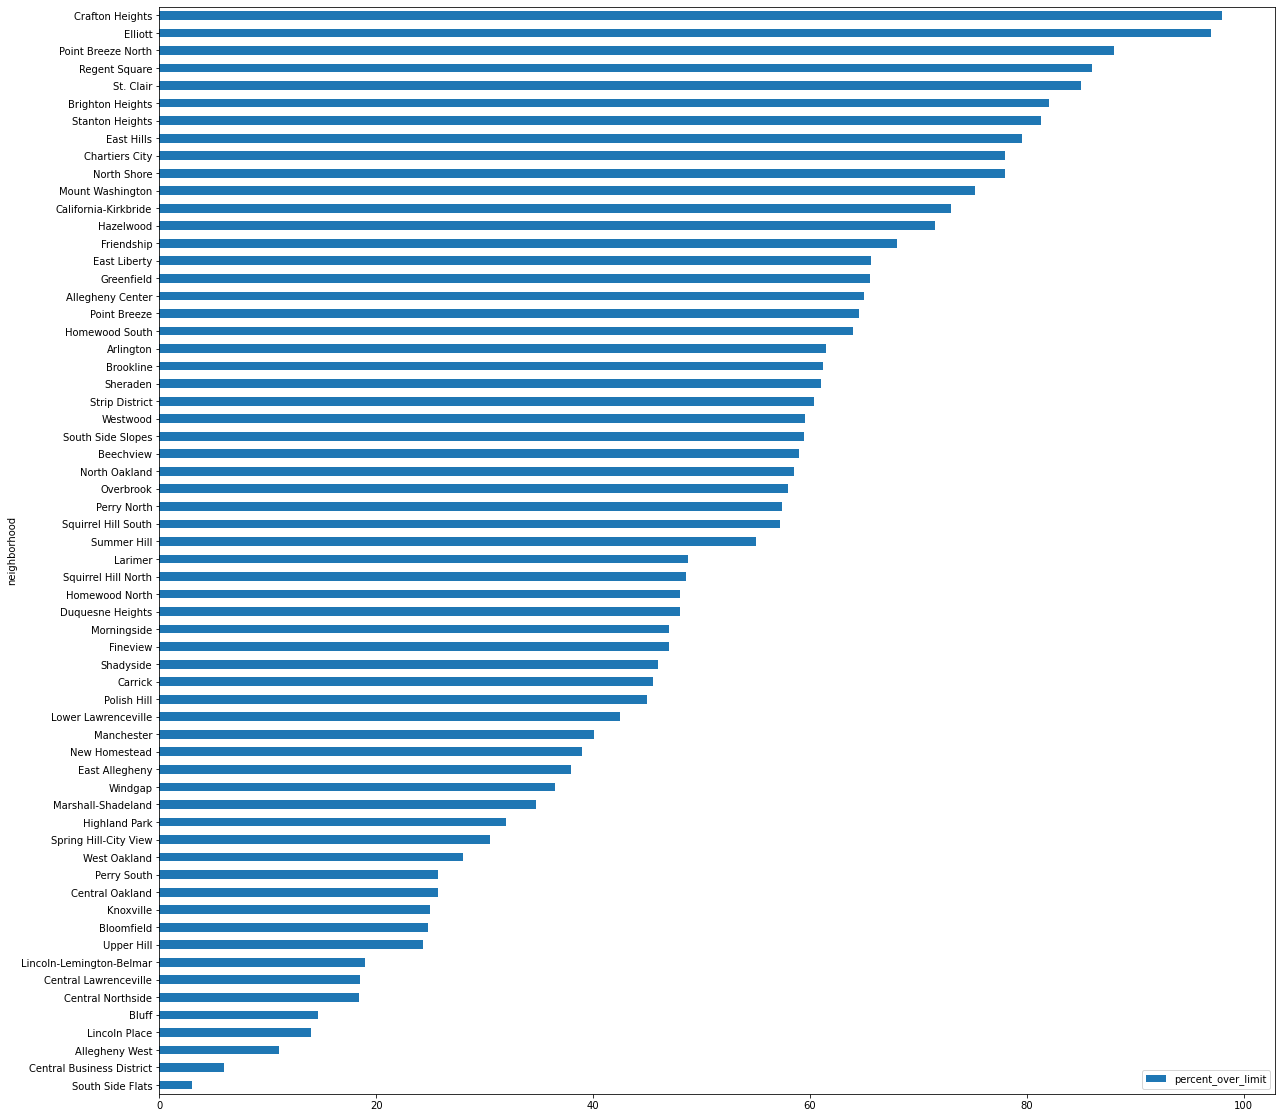

In [6]:
traffic_limit.groupby('neighborhood').mean().sort_values('percent_over_limit').plot.barh(figsize=(20,20));

## Conclusion

I think that these two metrics are super valuable to idicate a good, green neighborhood. With average daily car traffic you can find the average carbon dioxide output in that neighborhood hood per year. The average passenger car outputs 4.6 metric tons of carbon dioxide per year. You can multiply average daily traffic with that average output and get the neighborhood's average carbon dioxide per year from cars. With percent over limit, we can see how often people speed in that neihgborhood. While not super related to being green specifically, its harder to enjoy said greem space if people are speeding around the neighborhood. By these two metrics alone, the best neighborhood would be South Side Flats